In [3]:
#Reading files

import pandas as pd 

file_path='../dados/caso.csv'

df=pd.read_csv(file_path)

#Cleaning data and creating aux columns

df['date']=pd.to_datetime(df['date'])

df['state_line']=df.apply(lambda row: 1 if row['city_ibge_code']<100 else 0,axis=1)

df.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


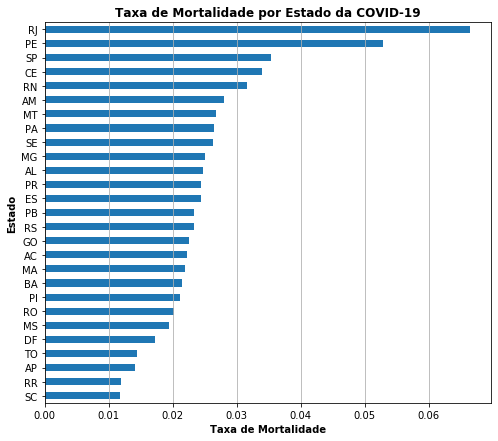

In [87]:
#Death rate by state

df_death_rate=df[(df.state_line==1) & (df.is_last==True)][['state','death_rate']]

ax=(df_death_rate
    .sort_values(by='death_rate',ascending=True)
    .plot(x='state',y='death_rate',kind='barh',figsize=(8,7)))

ax.xaxis.grid(True)
ax.get_legend().remove()

ylabel=ax.set_xlabel('Taxa de Mortalidade',fontweight='bold')
xlabel=ax.set_ylabel('Estado',fontweight='bold')
title=ax.set_title('Taxa de Mortalidade por Estado da COVID-19'
    ,fontweight='bold'
    ,fontsize='large')





(737475.0, 737509.0)

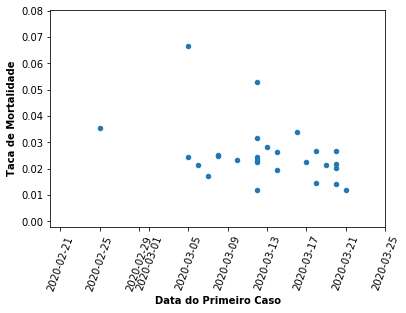

In [99]:
df_first_case=df[(df.state_line==1) & (df.order_for_place==1)][['date','state']].sort_values(by='date')

df_merged=pd.merge(df_death_rate,
            df_first_case,
            how='left',
            left_on='state',
            right_on='state')

ax_2=df_merged.plot.scatter(x='date',y='death_rate',rot=70)
ax_2.set_xlabel('Data do Primeiro Caso',fontweight='bold')
ax_2.set_ylabel('Taca de Mortalidade',fontweight='bold')

ax_2.set_xlim(pd.to_datetime('2020-02-20'),pd.to_datetime('2020-03-25'))

In [94]:
df_first_case

,date,state
822225,2020-02-25,SP
76495,2020-03-05,ES
548363,2020-03-05,RJ
89331,2020-03-06,BA
39127,2020-03-07,DF
20047,2020-03-08,AL
409587,2020-03-08,MG
722038,2020-03-10,RS
668861,2020-03-12,SC
589809,2020-03-12,PR
